<a href="https://colab.research.google.com/github/pshvaa/Spam-Detection/blob/main/SpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Description here: This program detects if an email is spam(1) or not spam

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string

In [3]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving mail_data.csv to mail_data.csv


In [4]:
#Read the csv file
df = pd.read_csv(r'mail_data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['Category'].value_counts()

,count
Category,
ham,4825
spam,747


In [6]:
df['Category'] = np.where(df['Category'] == 'spam', 1, 0)

In [7]:
df.Category.unique()

array([0, 1])

In [8]:
category_counts = df["Category"].value_counts()
category_counts

,count
Category,
0,4825
1,747


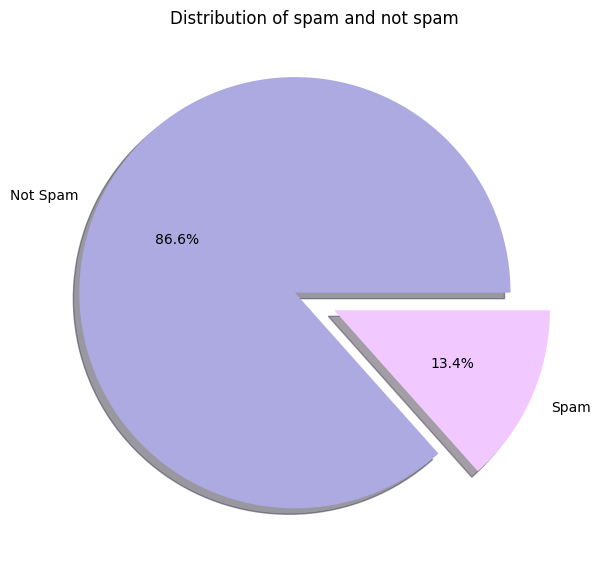

In [9]:
labels = ["Not Spam", "Spam"]
colors = ['#adaae1', '#f1c8ff']

plt.figure(figsize = (10, 7))
plt.pie(category_counts, labels=labels, autopct='%1.1f%%', colors = colors, explode = [0.1,0.1], shadow = True)
plt.title("Distribution of spam and not spam")
plt.show()

In [10]:
df.shape

(5572, 2)

In [11]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.shape

(5157, 2)

In [14]:
df.isnull().sum()

,0
Category,0
Message,0


* Now let's visualize words using WorldCloud

In [15]:
#Download the stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
def process_text(text):
  #1 remove the punctuation
  #2 remove stopwords
  #3 return the list of cleaan text words

  #1
  nopunc = [char for char in text if char not in string.punctuation]
  nopunc = ''.join(nopunc)

  #2
  clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

  #3
  return clean_words

In [17]:
#Show the tokenization ( a list of tokens also called lemmas)
df['Message'].head().apply(process_text)

,Message
0,"[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]"
1,"[Ok, lar, Joking, wif, u, oni]"
2,"[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receive, entry, questionstd, txt, rateTCs, apply, 08452810075over18s]"
3,"[U, dun, say, early, hor, U, c, already, say]"
4,"[Nah, dont, think, goes, usf, lives, around, though]"


In [18]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

Text(0.5, 1.0, 'Words ')

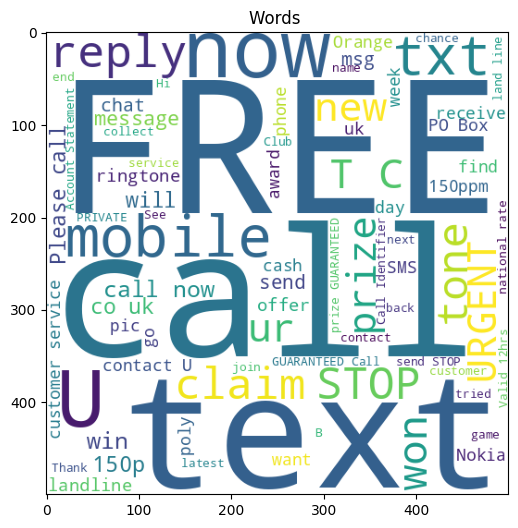

In [20]:
spam_wc = wc.generate(df[df['Category'] == 1]['Message'].str.cat(sep = " "))
plt.figure(figsize = (12,6))
plt.imshow(spam_wc)
plt.title('Words ')

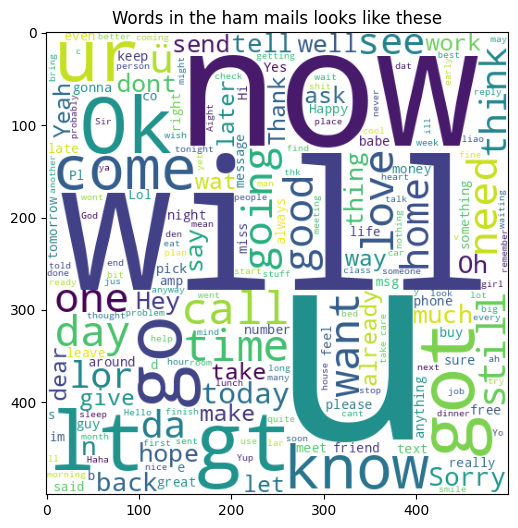

In [21]:
ham_wc = wc.generate(df[df["Category"] == 0]["Message"].str.cat(sep = " "))
plt.figure(figsize = (12, 6))
plt.title("Words in the ham mails looks like these")
plt.imshow(ham_wc)
plt.show()

In [19]:
#Example
message4 = 'hello world hello hello world play'
message5 = 'test test test test one hello'
print(message4)
print()

#Convert to text to a matrix pf token counts
from sklearn.feature_extraction.text import CountVectorizer
# bag of words
bow4 = CountVectorizer(analyzer = process_text).fit_transform([[message4,], [message5]])
print(bow4)
print()
print(bow4.shape)

hello world hello hello world play

  (0, 0)	3
  (0, 4)	2
  (0, 2)	1
  (1, 0)	1
  (1, 3)	4
  (1, 1)	1

(2, 5)


In [23]:
# Convert a collection of text to a matrix of tokens
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer = process_text).fit_transform(df['Message'])

In [24]:
#split the data train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['Category'], test_size = 0.2, random_state = 0)

In [25]:
messages_bow.shape

(5157, 11422)

In [26]:
#Create and train the Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
# Convert X_train to a dense NumPy array
X_train_dense = X_train.toarray()
classifier = MultinomialNB().fit(X_train_dense, y_train)

In [27]:
#Print the predictions
print(classifier.predict(X_train))

#PRint the actual values
print(y_train.values)

[0 1 0 ... 0 0 0]
[0 1 0 ... 0 0 0]


In [28]:
#Evaluate the model on the training dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train, pred))
print()
print('Confusion matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accuracy: \n', accuracy_score(y_train, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3619
           1       0.98      0.97      0.98       506

    accuracy                           0.99      4125
   macro avg       0.99      0.99      0.99      4125
weighted avg       0.99      0.99      0.99      4125


Confusion matrix: 
 [[3611    8]
 [  13  493]]

Accuracy: 
 0.9949090909090909


In [29]:
#Print the predictions
print(classifier.predict(X_test))

#PRint the actual values
print(y_test.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [30]:
#Evaluate the model on the training dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print(classification_report(y_test, pred))
print()
print('Confusion matrix: \n', confusion_matrix(y_test, pred))
print()
print('Accuracy: \n', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       897
           1       0.81      0.93      0.86       135

    accuracy                           0.96      1032
   macro avg       0.90      0.95      0.92      1032
weighted avg       0.96      0.96      0.96      1032


Confusion matrix: 
 [[867  30]
 [ 10 125]]

Accuracy: 
 0.9612403100775194


In [34]:
from sklearn.svm import SVC
svc = SVC(random_state = 0)
svc.fit(X_train, y_train)

SVC(random_state=0)

In [35]:
print(svc.predict(X_train))
print()
print(y_train.values)

[0 1 0 ... 0 0 0]

[0 1 0 ... 0 0 0]


In [38]:
pred_svc = svc.predict(X_train)
print('Classification Report: \n', classification_report(y_train, pred_svc))
print()
print('Confusion Matrix: \n', confusion_matrix(y_train, pred_svc))
print()
print('Accuracy score: \n', accuracy_score(y_train, pred_svc))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      3619
           1       1.00      0.95      0.98       506

    accuracy                           0.99      4125
   macro avg       1.00      0.98      0.99      4125
weighted avg       0.99      0.99      0.99      4125


Confusion Matrix: 
 [[3619    0]
 [  23  483]]

Accuracy score: 
 0.9944242424242424


In [39]:
pred_test = svc.predict(X_test)
print('Classification Report: \n', classification_report(y_test, pred_test))
print()
print('Confusion Matrix: \n', confusion_matrix(y_test, pred_test))
print()
print('Accuracy score: \n', accuracy_score(y_test, pred_test))

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       897
           1       1.00      0.67      0.81       135

    accuracy                           0.96      1032
   macro avg       0.98      0.84      0.89      1032
weighted avg       0.96      0.96      0.95      1032


Confusion Matrix: 
 [[897   0]
 [ 44  91]]

Accuracy score: 
 0.9573643410852714
